# Evaluado del modelo

 - En este cuaderno se mostrarán los resultados totales alcanzados por los modelos.
 - Se crearán dos gráficas, una para los modelos sin reranking y otra con los modelos con reranking.
 - De esta manera podremos ver mejor, que modelo obtiene mejores resultados.

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

In [220]:
llm = "mistral-small" 
db = "snow_512"  
clean = ""

carpeta_csv = "eval/" + llm + "/" + db + "/csv" 

archivos_csv = [    # sin reranking
    f for f in glob(os.path.join(carpeta_csv, "*.csv"))
    if not f.endswith("_rr.csv")
]

archivos_csv_rr = glob(os.path.join(carpeta_csv, "*_rr.csv")) # con reranking

metricas = ["accuracy", "faithfulness", "groundedness", "relevance"]
resumen_modelos = []
resumen_modelos_rr = []

 - Cargamos los modelos por separado

In [221]:
for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    # df = df[df['respuesta generada'] != 'No lo sé.']
    # clean = "_cleaned"
    nombre_modelo = os.path.basename(archivo).replace(".csv", "").replace("eval_", "")
    promedio = df[metricas].mean().round(2)
    promedio["estrategia"] = nombre_modelo
    resumen_modelos.append(promedio)

for archivo in archivos_csv_rr:
    df = pd.read_csv(archivo)
    # df = df[df['respuesta generada'] != 'No lo sé.']
    # clean = "_cleaned"
    nombre_modelo = os.path.basename(archivo).replace(".csv", "").replace("eval_", "")
    promedio = df[metricas].mean().round(2)
    promedio["estrategia"] = nombre_modelo
    resumen_modelos_rr.append(promedio)

df_resumen = pd.DataFrame(resumen_modelos)
df_resumen_rr = pd.DataFrame(resumen_modelos_rr)

In [222]:
df_combined = pd.concat([df_resumen, df_resumen_rr], ignore_index=True)
df_combined.to_csv(f"eval/{llm}/{db}/resumen{clean}.csv", index=False)

 - Mostramos los resultados sin reranking

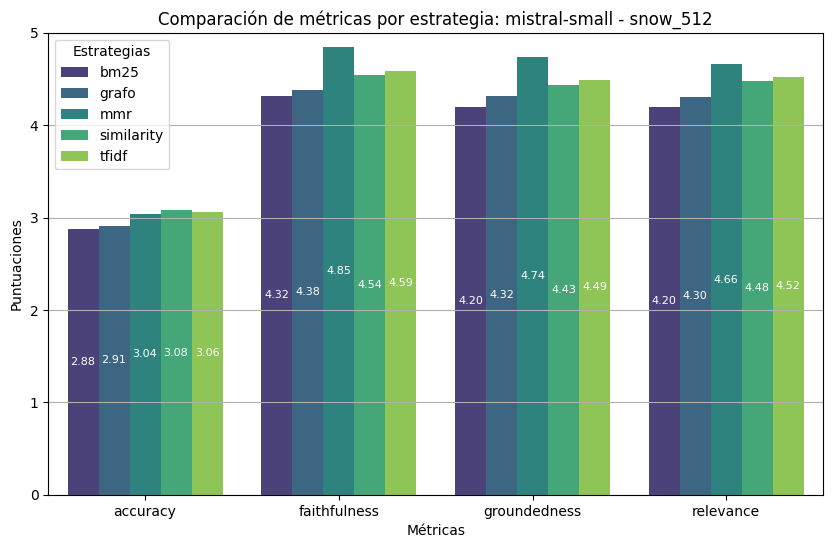

In [223]:
df_long = pd.melt(df_resumen, id_vars="estrategia", var_name="métrica", value_name="valor")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_long, x="métrica", y="valor", hue="estrategia", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=8)

plt.title("Comparación de métricas por estrategia: " + llm + " - " + db)
plt.ylim(0, 5)
plt.ylabel("Puntuaciones")
plt.xlabel("Métricas")
plt.legend(title="Estrategias")
plt.grid(True, axis='y')
plt.savefig(f"eval/{llm}/{db}/resumen{clean}.png")
plt.show()

 - Y los resultados con reranking

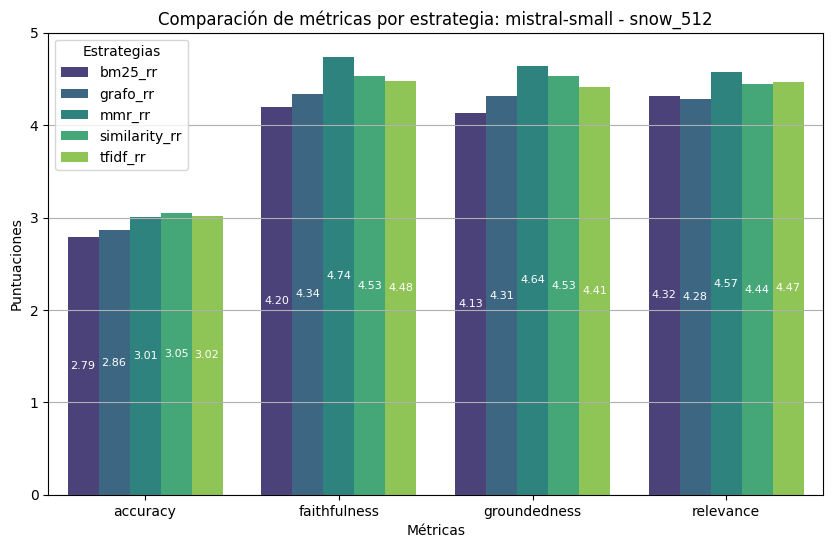

In [224]:
df_long_rr = pd.melt(df_resumen_rr, id_vars="estrategia", var_name="métrica", value_name="valor")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_long_rr, x="métrica", y="valor", hue="estrategia", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=8)
plt.title("Comparación de métricas por estrategia: " + llm + " - " + db)
plt.ylim(0, 5)
plt.ylabel("Puntuaciones")
plt.xlabel("Métricas")
plt.legend(title="Estrategias")
plt.grid(True, axis='y')
plt.savefig(f"eval/{llm}/{db}/resumen_rr{clean}.png")
plt.show()